<a href="https://colab.research.google.com/github/Sreejith311048/DLNLP_midterm/blob/main/DLNLP_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DLNLP Project 1


#### Imports

In [ ]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
pathToFolder = "/gdrive/MyDrive/bdda1/"
path = Path(pathToFolder) / "database.sqlite"
conn = sqlite3.connect(path)

In [ ]:
df = pd.read_sql("""SELECT Player_Attributes.*, Player.player_name, Player.height, Player.weight
                        FROM Player_Attributes
                        LEFT JOIN Player
                        ON Player_Attributes.player_api_id = Player.player_api_id
                        ORDER BY id;""", conn); df.head(); df.shape

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,182.88,187


(183978, 45)

In [ ]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [ ]:
for i in ['attacking_work_rate','defensive_work_rate']:
  df[i] = df[i].apply(lambda x: x if x in ['high', 'medium', 'low'] else 'medium')
df['preferred_foot'] = df['preferred_foot'].apply(lambda x: x if x in ['left', 'right'] else 'right')

In [ ]:
df['right_footer'] = df['preferred_foot'].apply(lambda x: 1 if x=='right' else 0)
df['att_work'] = df['attacking_work_rate'].apply(lambda x: 2 if x =='high' else(1 if x=='medium' else 0))
df['def_work'] = df['defensive_work_rate'].apply(lambda x: 2 if x =='high' else(1 if x=='medium' else 0))

In [ ]:
df.dropna(subset=['overall_rating'], inplace=True)

df.drop(columns = ['id', 'player_fifa_api_id','player_api_id', 'date',\
                   'player_name', 'preferred_foot','attacking_work_rate',\
                   'defensive_work_rate'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   overall_rating      183142 non-null  float64
 1   potential           183142 non-null  float64
 2   crossing            183142 non-null  float64
 3   finishing           183142 non-null  float64
 4   heading_accuracy    183142 non-null  float64
 5   short_passing       183142 non-null  float64
 6   volleys             181265 non-null  float64
 7   dribbling           183142 non-null  float64
 8   curve               181265 non-null  float64
 9   free_kick_accuracy  183142 non-null  float64
 10  long_passing        183142 non-null  float64
 11  ball_control        183142 non-null  float64
 12  acceleration        183142 non-null  float64
 13  sprint_speed        183142 non-null  float64
 14  agility             181265 non-null  float64
 15  reactions           183142 non-nul

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='overall_rating', ylabel='Density'>

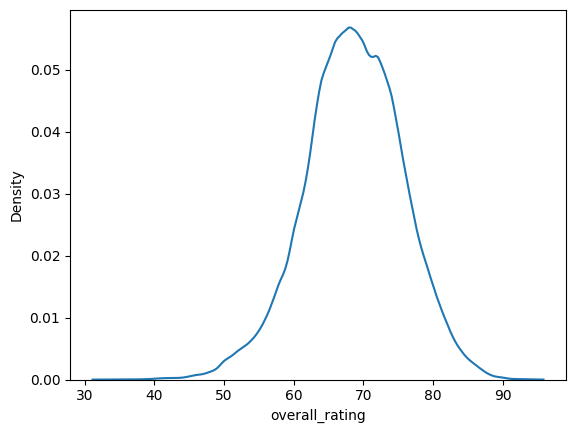

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='potential', ylabel='Density'>

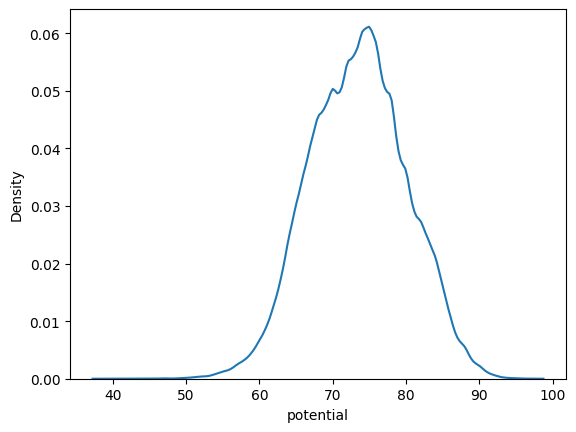

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='crossing', ylabel='Density'>

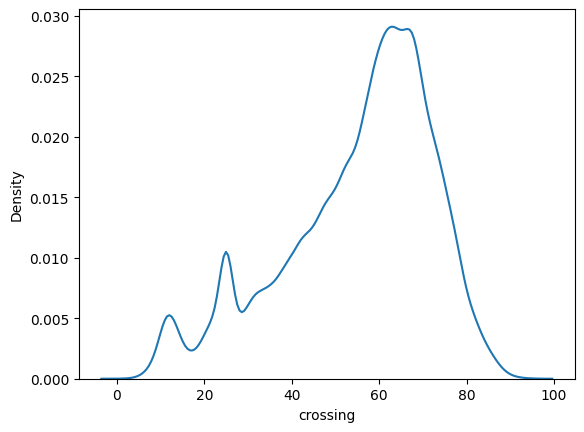

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='finishing', ylabel='Density'>

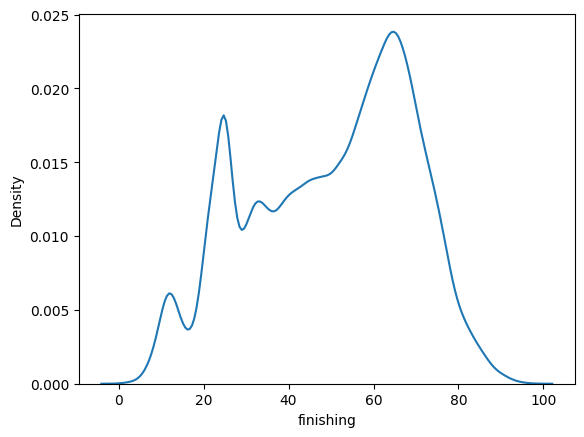

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='heading_accuracy', ylabel='Density'>

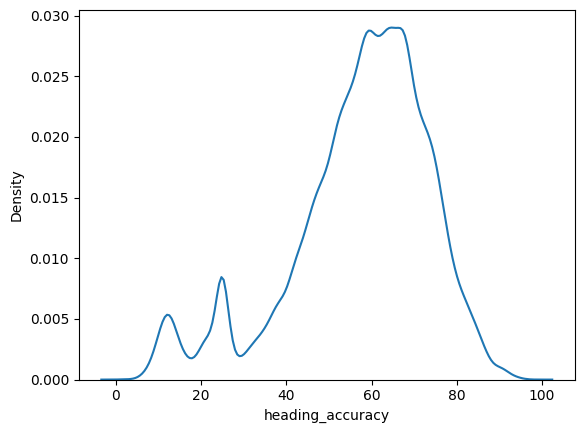

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='short_passing', ylabel='Density'>

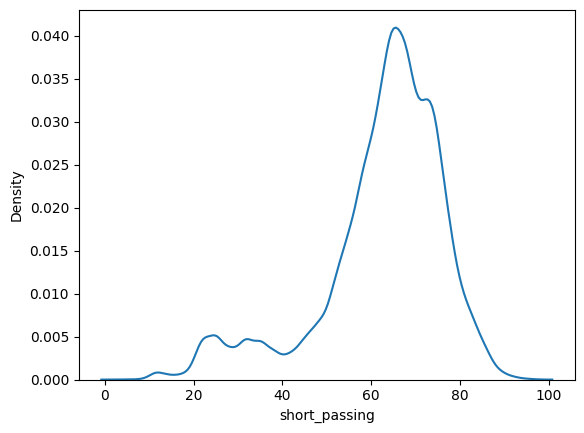

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='volleys', ylabel='Density'>

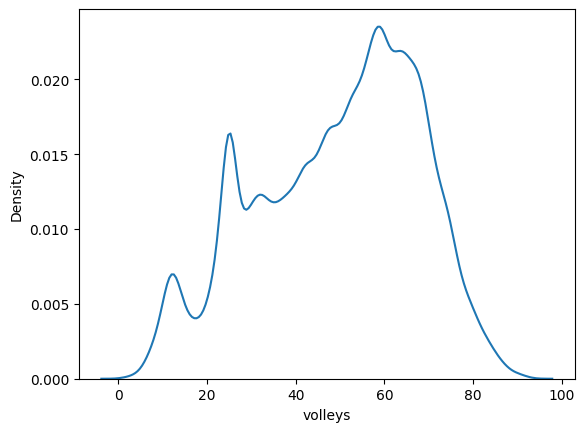

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='dribbling', ylabel='Density'>

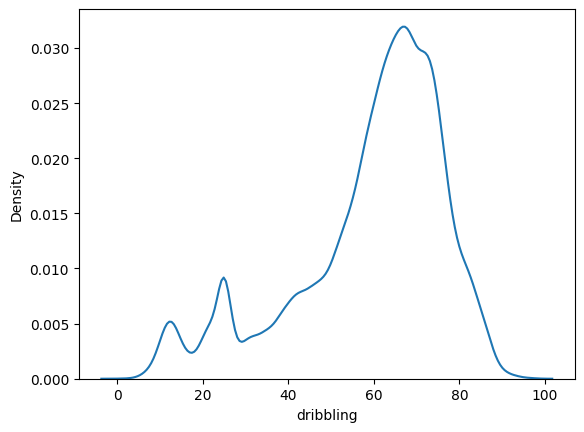

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='curve', ylabel='Density'>

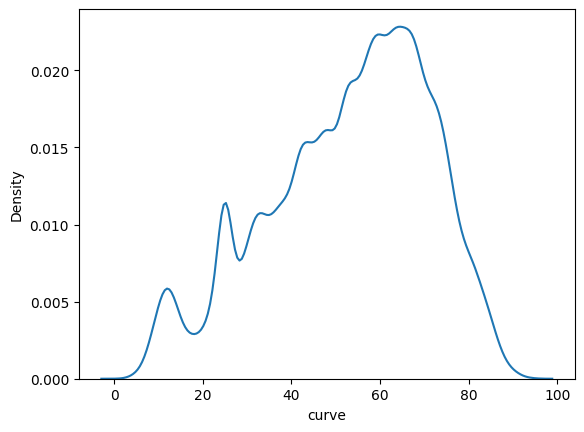

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='free_kick_accuracy', ylabel='Density'>

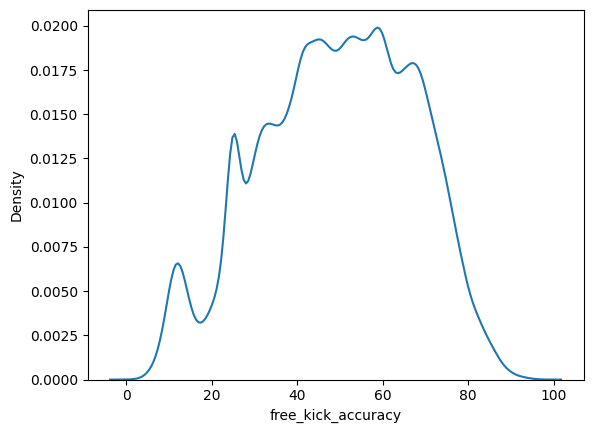

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='long_passing', ylabel='Density'>

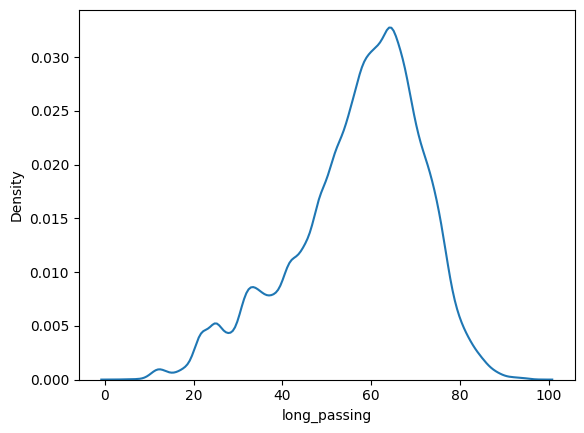

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='ball_control', ylabel='Density'>

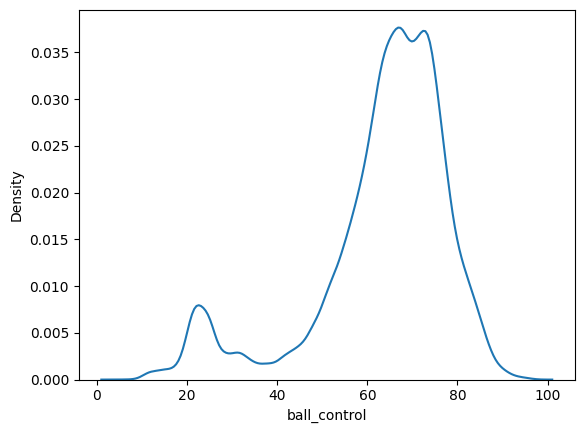

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='acceleration', ylabel='Density'>

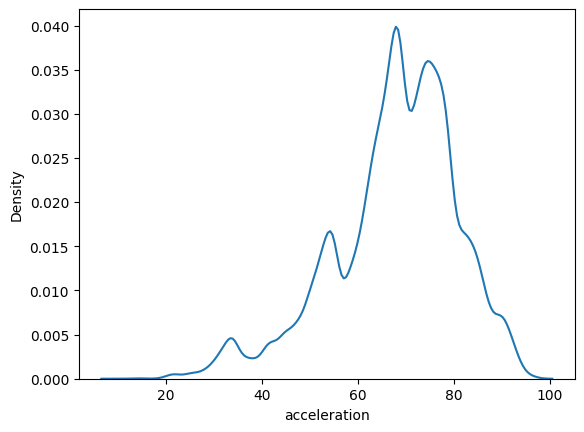

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='sprint_speed', ylabel='Density'>

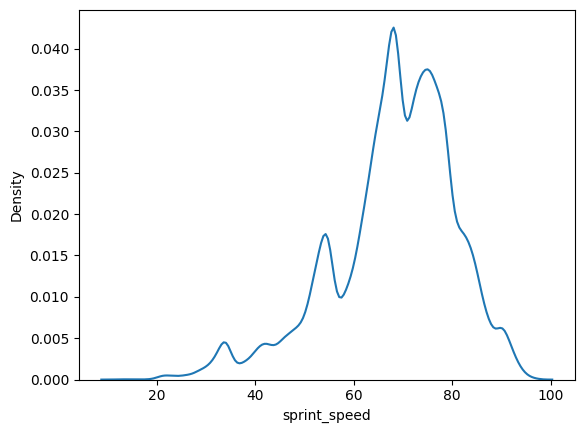

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='agility', ylabel='Density'>

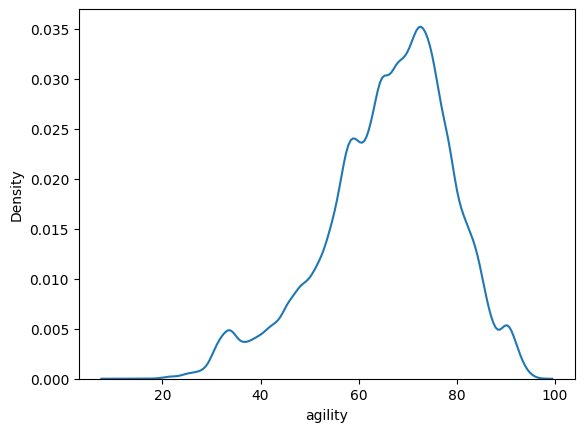

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='reactions', ylabel='Density'>

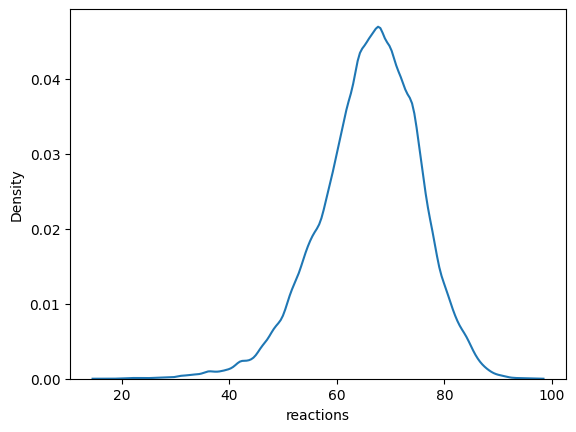

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='balance', ylabel='Density'>

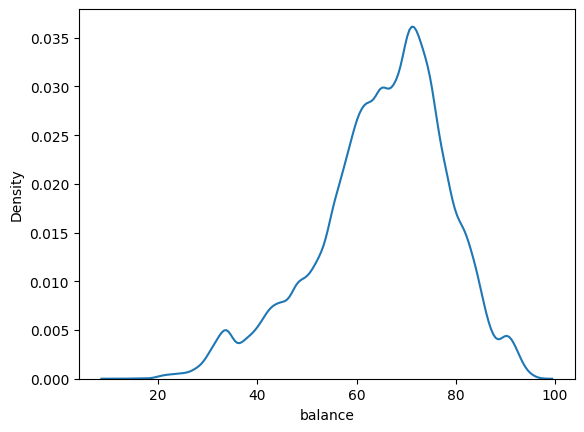

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='shot_power', ylabel='Density'>

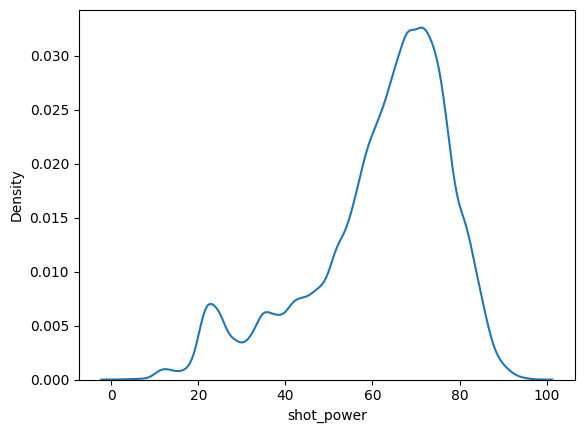

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='jumping', ylabel='Density'>

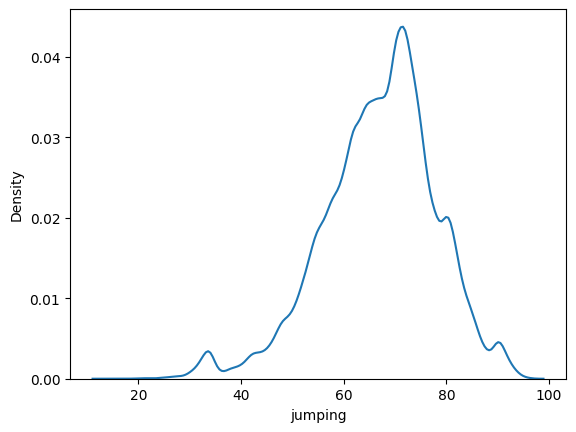

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='stamina', ylabel='Density'>

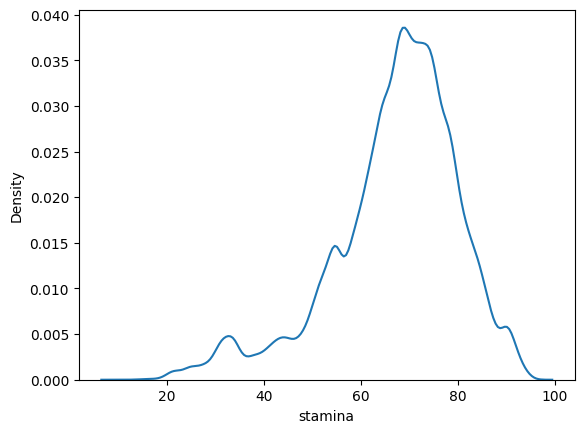

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='strength', ylabel='Density'>

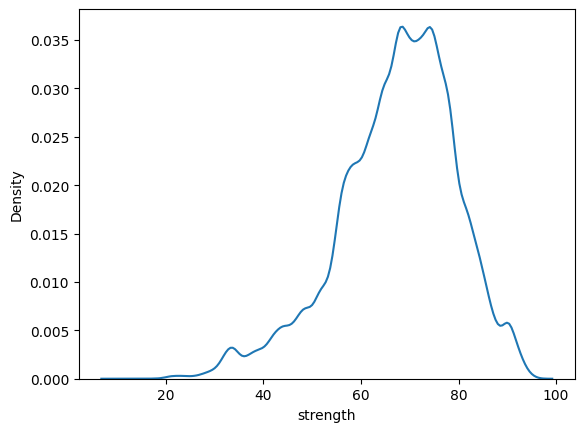

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='long_shots', ylabel='Density'>

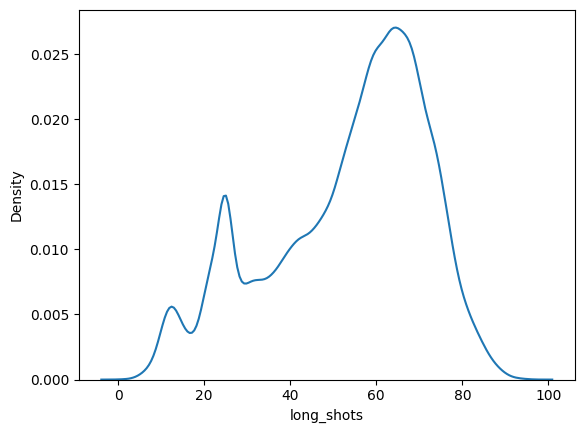

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='aggression', ylabel='Density'>

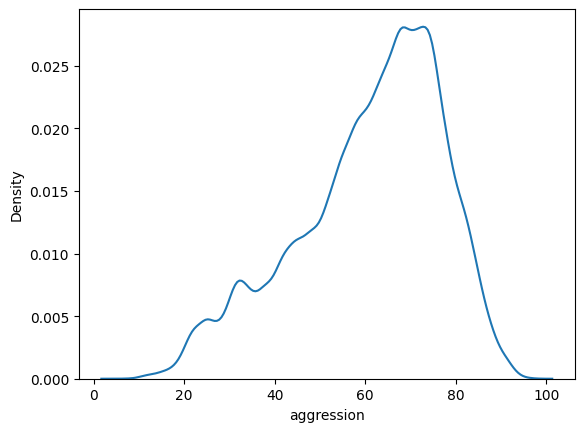

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='interceptions', ylabel='Density'>

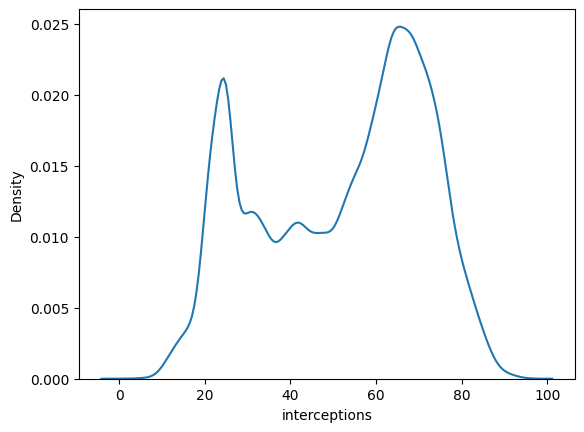

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='positioning', ylabel='Density'>

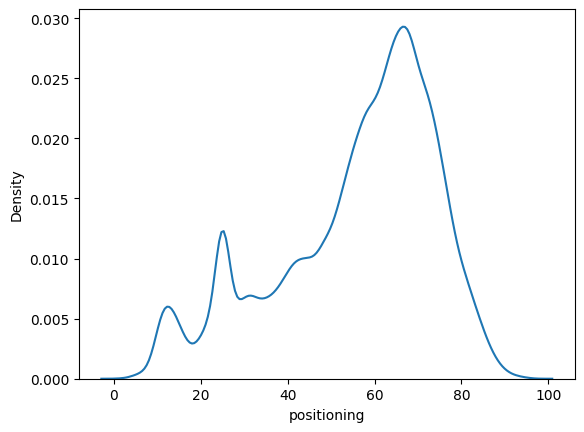

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='vision', ylabel='Density'>

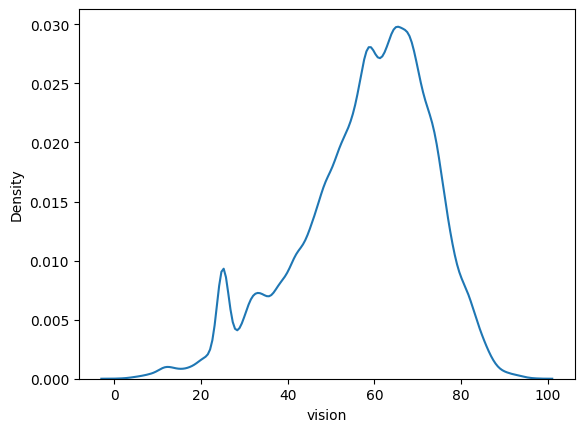

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='penalties', ylabel='Density'>

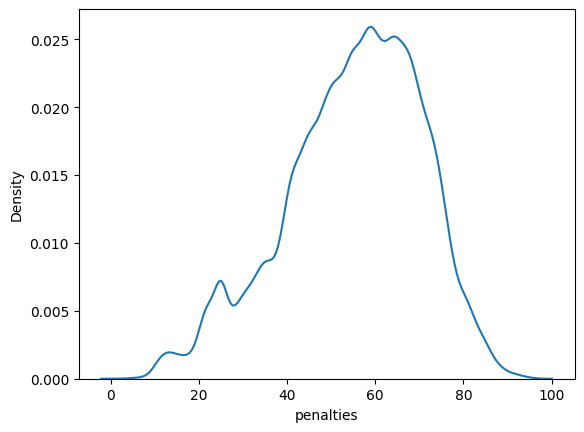

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='marking', ylabel='Density'>

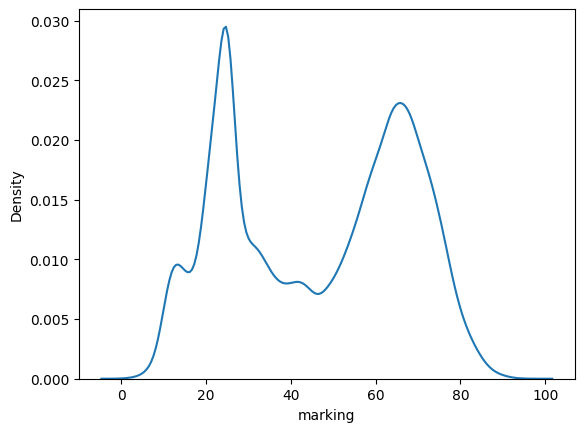

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='standing_tackle', ylabel='Density'>

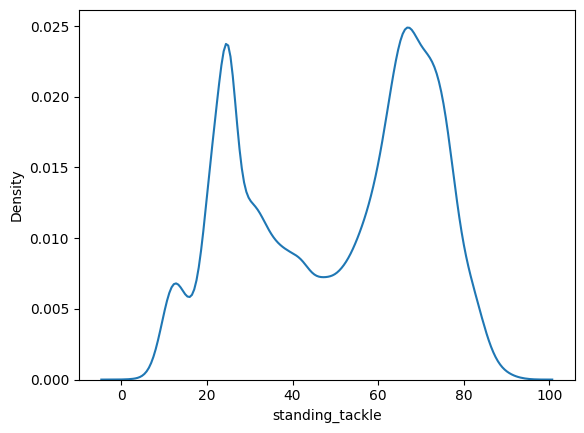

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='sliding_tackle', ylabel='Density'>

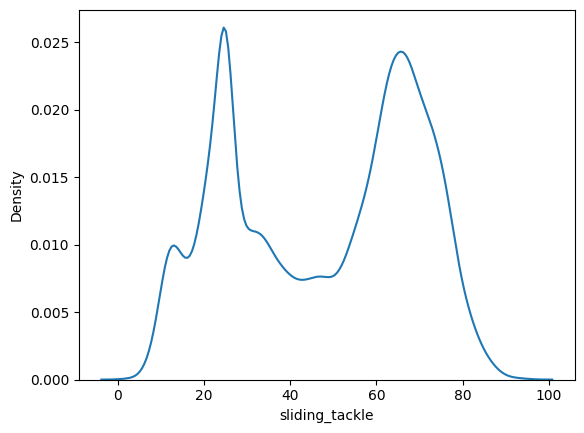

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_diving', ylabel='Density'>

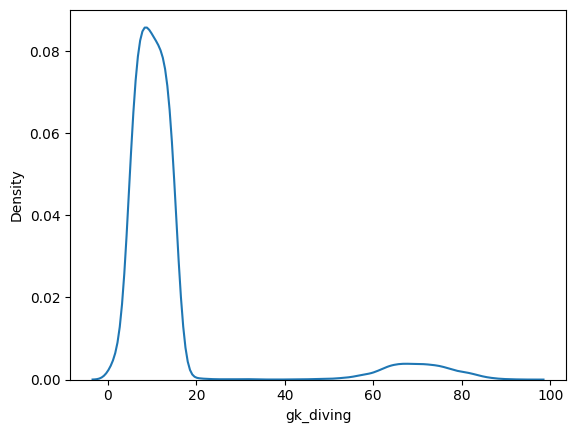

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_handling', ylabel='Density'>

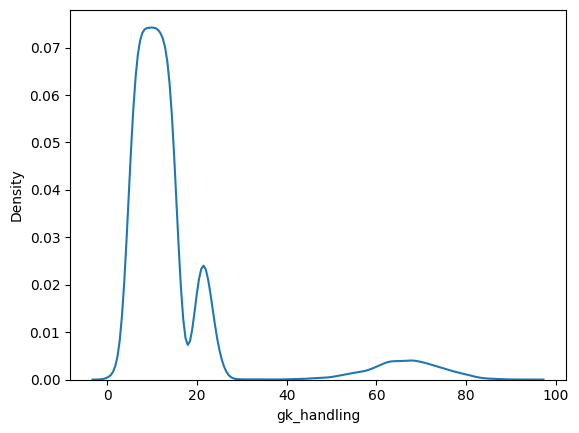

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_kicking', ylabel='Density'>

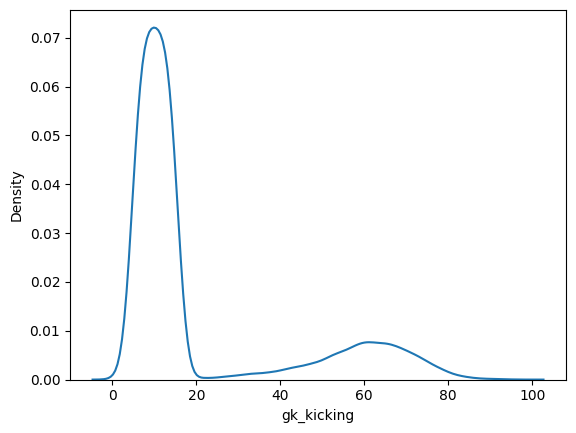

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_positioning', ylabel='Density'>

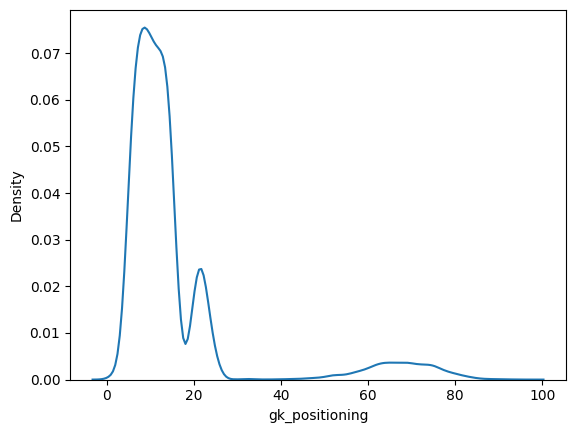

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_reflexes', ylabel='Density'>

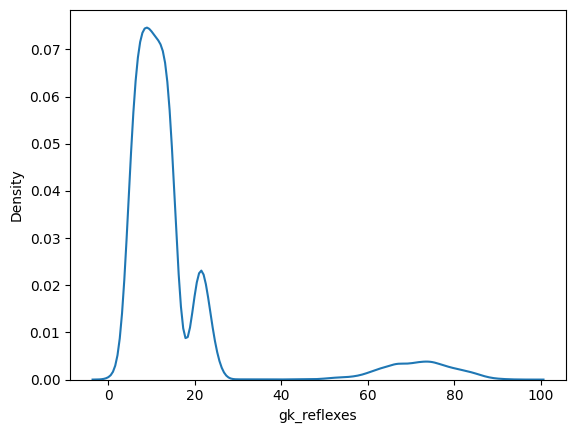

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='height', ylabel='Density'>

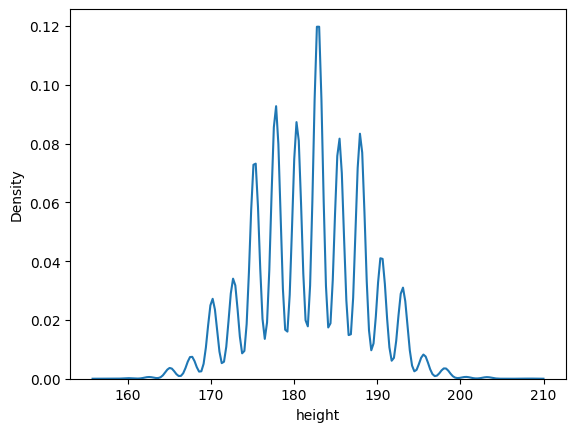

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='weight', ylabel='Density'>

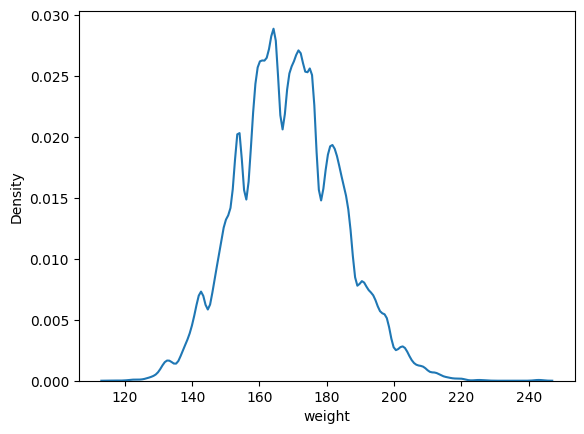

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='right_footer', ylabel='Density'>

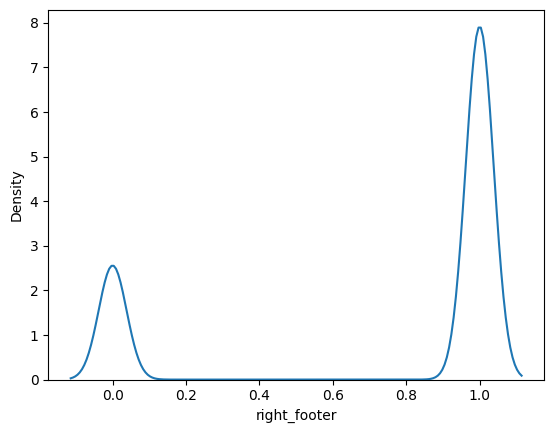

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='att_work', ylabel='Density'>

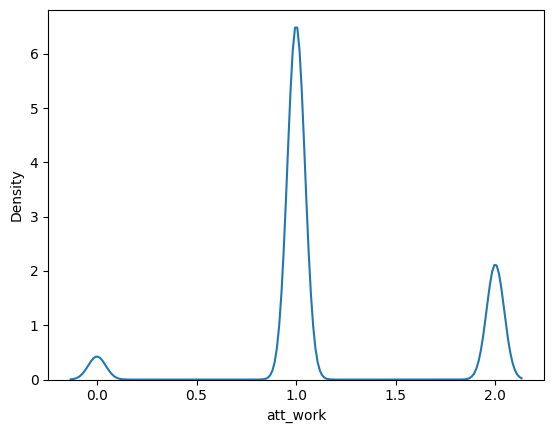

<ipython-input-16-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='def_work', ylabel='Density'>

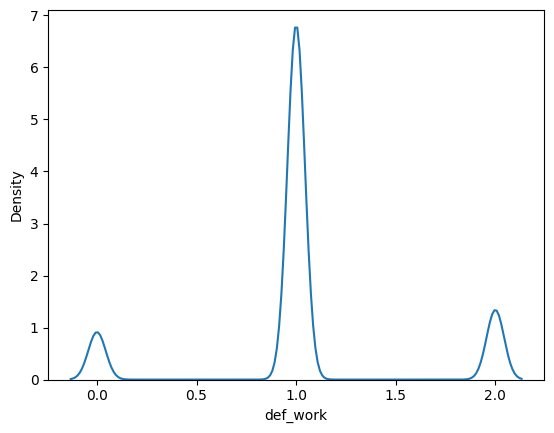

In [ ]:

for i in df.columns:
  sns.distplot(df[i], hist=False)
  plt.show()

In [ ]:
df.pop('potential')
y=df.pop('overall_rating')

0         71.0
1         71.0
2         66.0
3         65.0
4         65.0
          ... 
183973    85.0
183974    80.0
183975    80.0
183976    81.0
183977    81.0
Name: potential, Length: 183142, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

In [ ]:
columns = X_train.columns.tolist()

pipe = make_pipeline(SimpleImputer(strategy = 'median'), MinMaxScaler()).fit(X_train)

X_train = pd.DataFrame(pipe.transform(X_train), columns=columns).astype('float32')
X_test = pd.DataFrame(pipe.transform(X_test), columns=columns).astype('float32')

In [ ]:
X_train.shape

(137356, 38)

#### Model

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add( tf.keras.layers.Input(shape = (38,) ))

In [ ]:
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(256, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(256, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(1, ))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               4992      
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 333,953
Trainable params: 333,953
Non-tr

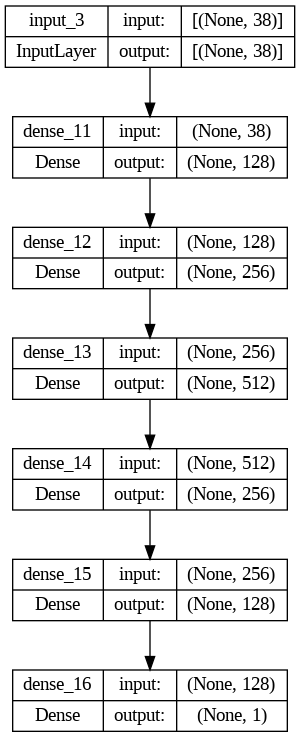

In [ ]:
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
model.compile(
                 loss = 'mae',
                 optimizer = 'adam',
                 metrics = ['mape', 'mae']
              )

In [ ]:
history1 = model.fit(X_train,y_train,
                    epochs = 50,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/50
4293/4293 [==============================] - 40s 9ms/step - loss: 1.8132 - mape: 2.6778 - mae: 1.8132 - val_loss: 1.1331 - val_mape: 1.6928 - val_mae: 1.1331
Epoch 2/50
4293/4293 [==============================] - 40s 9ms/step - loss: 1.2511 - mape: 1.8538 - mae: 1.2511 - val_loss: 1.8600 - val_mape: 2.7042 - val_mae: 1.8600
Epoch 3/50
4293/4293 [==============================] - 41s 10ms/step - loss: 1.1371 - mape: 1.6879 - mae: 1.1371 - val_loss: 1.2732 - val_mape: 1.8722 - val_mae: 1.2732
Epoch 4/50
4293/4293 [==============================] - 39s 9ms/step - loss: 1.0657 - mape: 1.5827 - mae: 1.0657 - val_loss: 0.8526 - val_mape: 1.2738 - val_mae: 0.8526
Epoch 5/50
4293/4293 [==============================] - 39s 9ms/step - loss: 1.0518 - mape: 1.5623 - mae: 1.0518 - val_loss: 1.2982 - val_mape: 1.9008 - val_mae: 1.2982
Epoch 6/50
4293/4293 [==============================] - 42s 10ms/step - loss: 1.0083 - mape: 1.4985 - mae: 1.0083 - val_loss: 1.3685 - val_mape: 1.9972 - 

(0.0, 3.0)

Text(0.5, 1.0, 'Change in mape over epochs')

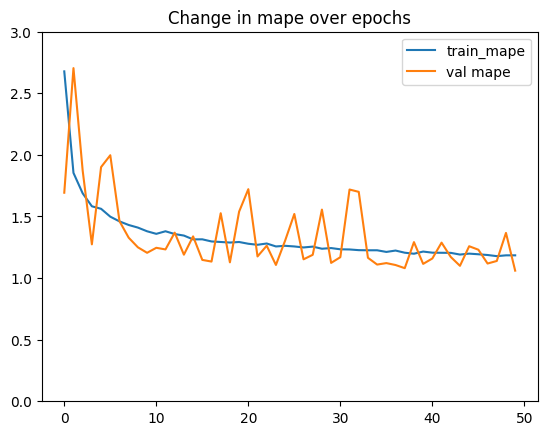

In [ ]:
loss = history1.history['mape']
val_loss = history1.history['val_mape']
plt.plot(loss, label = "train_mape")
plt.plot(val_loss, label = "val mape")
plt.legend()
plt.ylim([0, 3])
plt.title('Change in mape over epochs')

In [ ]:
df_weights = pd.DataFrame(model.layers[0].weights[0]); df_weights

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.137201,0.010794,-0.219375,0.032931,0.150856,0.676809,-0.152025,-0.199077,-0.218269,-0.123152,...,0.249916,-0.540750,-0.352725,-0.126920,0.074553,-0.034496,-0.750517,-0.149590,-0.969102,-0.058289
1,-0.319058,0.185429,-0.043717,-0.034835,-0.001296,-0.521620,0.057014,-0.260451,-0.494462,-0.114391,...,-0.079654,1.358478,0.197190,-0.061919,-0.204331,-0.141087,0.456254,-0.097759,1.242805,0.030976
2,0.169175,0.350029,-0.050821,0.043742,-0.118616,-0.428247,-0.077945,0.010557,0.135616,-0.045153,...,0.098948,0.300524,-0.089212,-0.073031,0.045542,-0.096412,0.374879,0.097825,0.475363,-0.142369
3,0.263138,0.349811,0.072321,-0.037039,-0.204024,0.448191,0.098778,-0.087466,-0.055935,-0.133050,...,-0.239311,-0.286003,0.262525,-0.009900,-0.150758,-0.030374,-0.251063,0.023804,-0.121249,0.026253
4,-0.022581,0.200671,0.104960,-0.102344,-0.040332,-0.280567,0.023973,0.121317,-0.041909,0.051037,...,-0.236432,0.316506,-0.177889,-0.068150,-0.225890,-0.092748,-0.036161,0.100815,0.130750,-0.155220
5,-0.366640,0.310934,0.127318,0.058750,-0.146013,0.258460,-0.138712,-0.147786,-0.477082,-0.019254,...,-0.427081,-0.155465,-0.147507,-0.148957,-0.037968,0.023079,-0.476274,-0.081597,-0.051819,0.058434
6,-0.087514,-0.044457,-0.150864,-0.187009,-0.064371,0.041790,0.151982,0.034565,-0.129588,0.061274,...,0.051138,0.113963,-0.117012,-0.126874,0.129412,-0.164609,0.015270,-0.015615,0.026122,-0.035690
7,0.012676,0.086745,0.020488,0.074668,-0.187264,-0.038353,0.063678,0.026316,0.053471,-0.081712,...,0.114419,0.048433,0.099010,-0.135027,0.027802,-0.041141,0.044184,-0.119245,0.234612,-0.189410
8,0.269585,0.044935,0.139203,0.168237,-0.210201,0.278326,-0.202679,-0.148784,-0.017960,0.033962,...,-0.430133,-0.679053,0.120366,0.133673,-0.226897,-0.063206,-0.056365,-0.058848,-0.345484,0.145654
9,0.175468,0.455268,0.130097,-0.022346,0.092018,0.409154,-0.046002,-0.039509,-0.139368,0.113641,...,-0.198729,0.105652,0.156460,0.148894,0.045523,-0.257331,-0.030508,-0.163294,0.065544,-0.098428


In [ ]:
weights = [df_weights[i] for i in df_weights.index]
df_imp = pd.DataFrame(zip(columns, sum(abs(number) for number in weights)), columns=['Variable_name', 'Importance']); df_imp

,Variable_name,Importance
0,crossing,6.351486
1,finishing,6.732595
2,heading_accuracy,4.639240
3,short_passing,5.706452
4,volleys,4.120493
5,dribbling,6.351297
6,curve,4.201118
7,free_kick_accuracy,3.639853
8,long_passing,5.104100
9,ball_control,5.073765


In [ ]:
df_imp.sort_values('Importance', ascending=False)

,Variable_name,Importance
21,interceptions,7.674739
28,gk_diving,7.630616
27,sliding_tackle,6.920548
1,finishing,6.732595
26,standing_tackle,6.654507
30,gk_kicking,6.521350
25,marking,6.365568
0,crossing,6.351486
5,dribbling,6.351297
22,positioning,6.176274
